<a href="https://colab.research.google.com/github/Firoz-Thakur/Machine-Learning/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

In [ ]:
import pandas as pd

In [ ]:
dataset=pd.read_csv(url, na_values='?', skipinitialspace=True, header=None, sep='\s+')

In [ ]:
dataset.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
columns=['mpg','cylinders','displacement', 'horsepower','weight','acceleration','year', 'origin', 'car_name']

In [ ]:
dataset.columns=columns

In [ ]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
dataset.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
year            0
origin          0
car_name        0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['car_name']=le.fit_transform(dataset['car_name'])

In [ ]:
from sklearn.impute import SimpleImputer
im=SimpleImputer(strategy='mean')
dataset=im.fit_transform(dataset)

In [ ]:
pd.DataFrame(dataset).isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
dataset=pd.DataFrame(dataset)

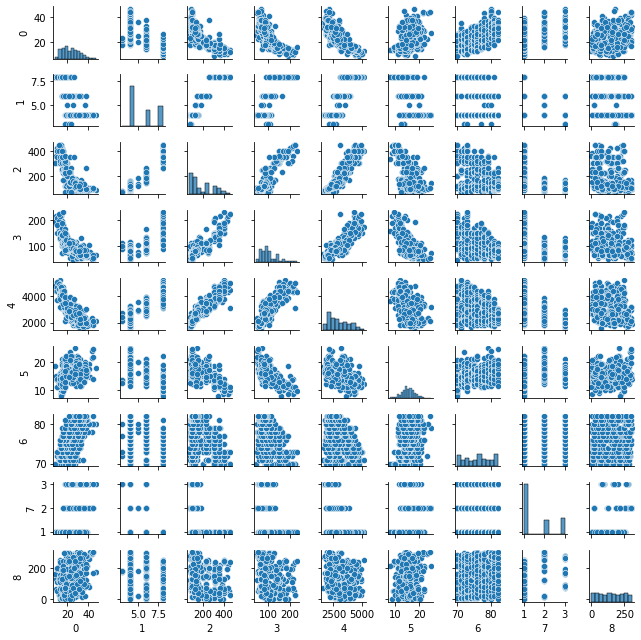

In [ ]:
sns.pairplot(dataset, height=1)
plt.tight_layout()
plt.show()


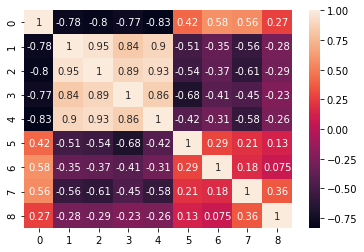

In [ ]:
import numpy as np
corrcoef=np.corrcoef(dataset.T.values)
sns.heatmap(corrcoef, annot=True)
plt.show()

In [ ]:
target=dataset[[0]]

In [ ]:
target.shape

(398, 1)

In [ ]:
x=dataset[[4]]

In [ ]:
x.shape

(398, 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, target, test_size=0.3)

In [ ]:
x_train.shape

(278, 1)

In [ ]:
x_test.shape

(120, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
pd.DataFrame(x_train).describe

<bound method NDFrame.describe of           4
81   2288.0
28   4732.0
8    4425.0
124  3664.0
75   4077.0
..      ...
230  4165.0
355  2210.0
357  2615.0
155  3158.0
58   2126.0

[278 rows x 1 columns]>

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(lr.predict(x_train), y_train))
print(r2_score(lr.predict(x_train), y_train))

17.864805236918798
0.5607404228163896


In [ ]:
print(mean_squared_error(lr.predict(x_test), y_test))
print(r2_score(lr.predict(x_test), y_test))

21.064676483925346
0.43769367370108303


In [ ]:
data=dataset.drop(columns=[0])

In [ ]:
data.shape

(398, 8)

In [ ]:
pd.DataFrame(data).describe()

,1,2,3,4,5,6,7,8
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864,148.550251
std,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055,89.495880
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000,65.250000
50%,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000,150.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,225.750000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,304.000000


In [ ]:
x_train1, x_test1, y_train1, y_test1=train_test_split(data, target, test_size=0.3)

In [ ]:
x_train_sc=sc.fit_transform(x_train1)
x_test_sc=sc.fit_transform(x_test1)

In [ ]:
lr1=LinearRegression()
lr1.fit(x_train_sc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(mean_squared_error(lr1.predict(x_train_sc), y_train))
print(r2_score(lr1.predict(x_train_sc), y_train))

57.72207957911415
-69.9993200836687


In [ ]:
print(mean_squared_error(lr1.predict(x_test_sc), y_test))
print(r2_score(lr1.predict(x_test_sc), y_test))

68.06720285496348
-81.01194741202534


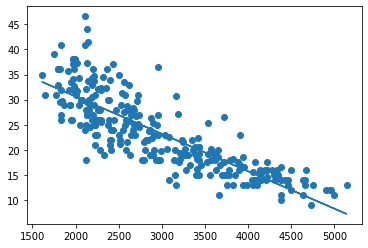

In [ ]:
a=np.sort(x_train)
b=lr.predict(a)
plt.scatter(x_train, y_train)
plt.plot(a,b)
plt.show()